# INVESTMENT VC DATASET

## EDA (EXPLORATORY DATA ANALYSIS)

### SUMARIO
### 1. Limpieza de datos
### 2. Esperanza Matematica por industria
### 3. Esperanza Matematica por pais

#### 1. Limpieza de datos

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

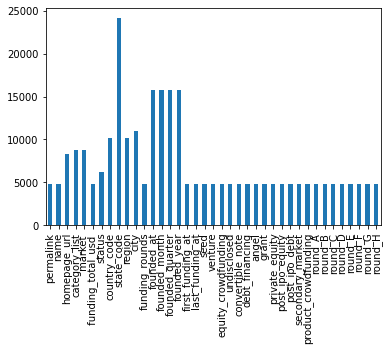

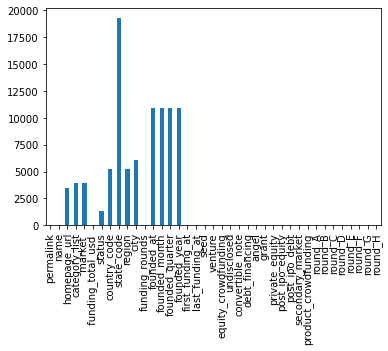

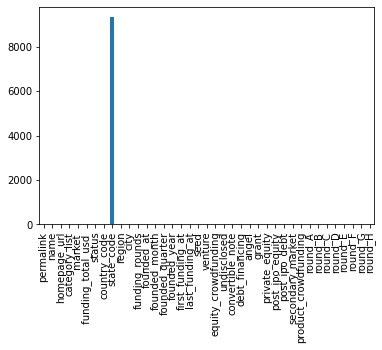

16.0
6.0


,permalink,name,homepage_url,category_list,market,status,country_code,state_code,region,city,...,round_C,round_D,round_E,round_F,round_G,round_H,funding_total,from_founding_to_funding,from_first_to_last_funding,from_founding_to_last_funding
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,acquired,USA,NY,New York City,New York,...,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,2505600000000000,0,2505600000000000
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,operating,GBR,NaN,London,London,...,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,0,0,0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,operating,USA,IL,"Springfield, Illinois",Champaign,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143856000000000000,0,143856000000000000
10,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,|E-Commerce|,E-Commerce,operating,CHL,NaN,Santiago,Las Condes,...,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,35769600000000000,0,35769600000000000
15,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,|Education|,Education,operating,GBR,NaN,London,London,...,0.0,0.0,0.0,0.0,0.0,0.0,4400000.0,0,55814400000000000,55814400000000000


In [1]:

#IMPORTAMOS LIBRERIAS GENERALES
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

#IMPORTAMOS EL FICHERO CSV INVESTMENT_VC
df = pd.read_csv('investments_VC.csv', encoding='latin_1', sep=',')


#COMPROBAMOS SI HAY VALORES NAN Y LOS REPRESENTAMOS GRAFICAMENTE
print(df.isna().sum())

df.isna().sum().plot(kind="bar")
plt.show()

#Eliminamos las ultimas filas que solo contienen Nan
df_clean = df.dropna(how='all')

df_clean.isna().sum().plot(kind="bar")
plt.show()

#Eliminamos las filas que contienen Nan, excepto los Nan de la columna State_code
#Las columna de State_code es exclusiva para las startups de USA
seleccion = df_clean.columns[2:8]
df_clean = df_clean.dropna(subset=seleccion, how='any')

seleccion2 = df_clean.columns[10:]
df_clean = df_clean.dropna(subset=seleccion2, how='any')

df_clean.isna().sum().plot(kind="bar")
plt.show()


#INVESTIGAMOS EL DATASET

#print(df_clean.info())
#print(df_clean.shape)
#print(df_clean.describe())
#print(df_clean.columns)


#CREAR UNA NUEVA COLUMNA 'funding_total' CON LA SUMA DE TODOS LOS FUNDINGS QUE RECIBE CADA STARTUP
#SE CREA ESTA COLUMNA PORQUE LA COLUMNA EXISTENTE ' funding_total_usd ' PRESENTA ERRORES EN LOS DATOS
#ELIMINAMOS LA COLUMNA ' funding_total_usd ' QUE PRESENTA ERRORES EN LOS DATOS
df_clean['funding_total'] = df_clean[df_clean.columns[17:30]].sum(axis=1) 
df_clean = df_clean.drop([' funding_total_usd '], axis=1)

#REDUCIR A SOLO STARTUPS FUNDADAS DE 2005 EN ADELANTE
millennials = df_clean['founded_year'] > 2004
df_clean = df_clean[millennials]

#ELIMINAMOS LAS STARTUPS DE CHINA PARA NO CONTAMINAR LOS DATOS
#BUSCAMOS PREDECIR EL FUNDING EXTERNOS QUE PUEDA RECIBIR UNA STARTUP
#LAS STARTUPS DE CHINA RECIBEN FINANCIACION DEL ESTADO, POR LO QUE CONTAMINAN EL DATO DE FUNDING
chinese = df_clean[df_clean['country_code'] == 'CHN'].index
df_clean = df_clean.drop(chinese)

#DETECTAR Y ELIMINAR OUTLIERS DENTRO DE LA VARIABLE FUNDING_TOTAL
q_funding = df_clean['funding_total'].quantile(0.9)

'''
#COMPROBAMOS LA INFO DE LOS OUTLIERS PARA ANALIZARLOS ANTES DE ELIMINARLOS
df_outliers = df_clean[df_clean['funding_total'] > q_funding]
print('\nEstos son las startups outliers en funding\n')
display(df_outliers)

print('La media de inversion en outliers es: ', round(df_outliers['funding_total'].mean(),2))
print('La MEDIANA de inversion en outliers es: ', round(df_outliers['funding_total'].median(),2))
print('La MODA de inversion en outliers es: ', round(df_outliers['funding_total'].mode(),2))
print('El MINIMO de inversion en outliers es: ', round(df_outliers['funding_total'].min(),2))
print('EL MAXIMO de inversion en outliers es: ', round(df_outliers['funding_total'].max(),2))
print('La VARIACION de inversion en outliers es: ', round(df_outliers['funding_total'].var(),2))
print('La STD DEV de inversion en outliers es: ', round(df_outliers['funding_total'].std(),2), '\n')

#comprobar cual es la startup con max funding
print('\nEsta es la startup con max funding\n')
print(df_outliers[['name', 'funding_total']].agg([np.max]))
'''
df_clean = df_clean[df_clean['funding_total'] < q_funding]


#ELIMINAMOS LOS OUTLIERS QUE TIENEN MUCHAS RONDAS DE FINANCIACION (17, cuando la media es 1.8)

#COMPROBAMOS EL MAX, MEAN Y PERCENTIL 99 DE LOS FUNDING ROUNDS
print(df_clean['funding_rounds'].max())
print(df_clean['funding_rounds'].quantile(0.99))
df_clean['funding_rounds'].mean()

q_funding_rounds = df_clean['funding_rounds'].quantile(0.99)
df_clean = df_clean[df_clean['funding_rounds'] < q_funding_rounds]

#ELIMINAMOS EL ERROR EN LOS DATOS EN LA FECHA DE PRIMERA FINANCIACION
df_clean = df_clean[df_clean['first_funding_at'] >= '2005-01-01']

df_clean = df_clean[df_clean['last_funding_at'] >= '2005-01-01']

df_clean = df_clean[df_clean['founded_at'] >= '2005-01-01']

#Transformamos el formato de la columna con la fecha de la primera inversión recibida de 'object' a 'datetime'
df_clean['first_funding_at'] = pd.to_datetime(df_clean['first_funding_at'])

#Transformamos el formato de la columna con la fecha de la última inversión recibida de 'object' a 'datetime'
df_clean['last_funding_at'] = pd.to_datetime(df_clean['last_funding_at'])

#Transformamos el formato de la columna con la fecha de la última inversión recibida de 'object' a 'datetime'
df_clean['founded_at'] = pd.to_datetime(df_clean['founded_at'])

#ELIMINAMOS LAS STARTUPS QUE APARECEN CON FINANCIACION ANTES DE SU CREACION
#ESTO PUEDE OCURRIR EN LA REALIDAD, SOBRE TODO EN FASES INICIALES COMO LA SEED Y PRE-SEED
#SIN EMBARGO MUCHOS SERAN ERRORES YA QUE LA DEIFFERENCIA ENTRE FIRST FUNDING Y FOUNDED DE ALGUNAS ES DE AÑOS
df_clean = df_clean[df_clean['founded_at'] <= df_clean['first_funding_at']]


#HAY STARTUPS QUE RECIVIERON FUNDING ANTES DE SU FUNDACION, LAS ANALIZAMOS Y VEMOS CUANTOS DIAS ANTES

'''
df_error = df_clean[df_clean['founded_at'] > df_clean['first_funding_at']]

#CREAMOS UNA NUEVA COLUMNA CON LA DIFERENCIA DE DIAS Y LO ORDENAMOS DE FORMA DESCENDENTE
df_error['diff_found_first_funding'] = df_error['founded_at'] - df_error['first_funding_at']
df_error = df_error.sort_values(by=['diff_found_first_funding'], ascending=False)


df_error[['founded_at', 'first_funding_at', 'diff_found_first_funding']]
df_error[df_error['diff_found_first_funding'] > '1000 days']

DESPUES DE ANALIZARLAS, HE DECIDO ELIMINARLAS DEL DATAFRAME YA QUE ES UN NUMERO PEQUEÑO,
ADEMAS ES DIFICIL ESTABLECER UNA FRONTERA PARA DECIDIR SI ELIMINAR UNOS U OTROS 
DEPENDIENDO EN LA DIFERENCIA ENTRE FIRST FUNDING Y FOUNDED_AT

ALGUNAS STARTUPS RECIBEN FUNDING EXTERNO ANTES DE SER FUNDADAS, EN LA FASE PRE-SEED, DONDE TODAVIA SON UNA IDEA Y NO UNA SOCIEDAD O COMPANIA
SIN EMBARGO, HAY MUCHAS STARTUPS CON AÑOS DE DIFERENCIA ENTRE FIRST FUNDING Y FOUNDED DATE
'''
#Comprobamos si las 3 columnas se han transformado al formato datetime64
#print(df_clean.dtypes)

#CREAMOS COLUMNAS SINTETICAS PARA MOSTRAR EL TIEMPO TRANSCURRIDO ENTRE:
#FROM FOUNDED TO FIRST FUNDING
df_clean['from_founding_to_funding'] = pd.to_numeric(df_clean['first_funding_at'] - df_clean['founded_at'])

#FROM FIRST FUNDING TO LAST FUNDING
df_clean['from_first_to_last_funding'] = pd.to_numeric(df_clean['last_funding_at'] - df_clean['first_funding_at'])
#df_clean['from_first_to_last_funding'] = pd.to_numeric(df_clean['from_first_to_last_funding'])

#FROM FOUNDED TO LAST FUNDING
df_clean['from_founding_to_last_funding'] = pd.to_numeric(df_clean['last_funding_at'] - df_clean['founded_at'])

#IMPRIMIMOS LAS ESTADISTICAS
'''
print('FROM FOUNDED TO FIRST FUNDING')
print(df_clean['from_founding_to_funding'].mean())
print(df_clean['from_founding_to_funding'].median())
print(df_clean['from_founding_to_funding'].max())

print('FROM FIRST FUNDING TO LAST FUNDING')
print(df_clean['from_first_to_last_funding'].mean())
print(df_clean['from_first_to_last_funding'].median())
print(df_clean['from_first_to_last_funding'].max())

print('FROM FOUNDED TO LAST FUNDING')
print(df_clean['from_founding_to_last_funding'].mean())
print(df_clean['from_founding_to_last_funding'].median())
print(df_clean['from_founding_to_last_funding'].max())
'''

df_clean.head()


### 2. Mathematical Expectation
#### 2.1 Por tipo de industria

Numero total de startups en el set:  19599
Numero total de sectores unicos en el set:  672
Numero total de sectores unicos en la agrupacion:  672

COMPROBAMOS SI HAY ALGUN NAN


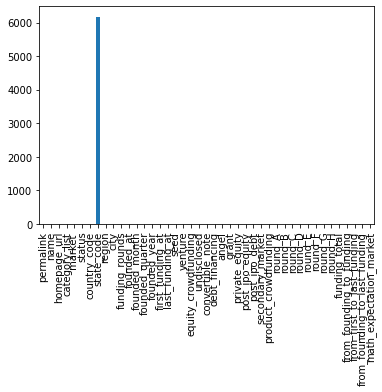

,market,startups,startups_percentage,expected_in_top,startups_top,math_expectation
227,Fitness,28,0.142864,1.428644,1.0,-30.003571


In [2]:

#AGRUPAMOS LAS STARTUPS POR INDUSTRIA Y CALCULAMOS EL TOTAL QUE TENEMOS
total_startups = (df_clean.groupby(' market ')['name'].count()).sum()

print('Numero total de startups en el set: ', total_startups)
print('Numero total de sectores unicos en el set: ', len(df_clean[' market '].unique()))

#CREAMOS UN DATAFRAME DEL AGRUPAMIENTO PARA TRABAJAR CON EL 
group_industry = pd.DataFrame(df_clean.groupby(' market ')['name'].count())
group_industry.reset_index(inplace=True)
group_industry.rename(columns={'name':'startups'}, inplace=True)
print('Numero total de sectores unicos en la agrupacion: ', len(group_industry[' market '].unique()))

#ANADIMOS UNA COLUMNA CON EL % DE STARTUPS POR INDUSTRIA COMPARADO CON EL TOTAL
group_industry['startups_percentage'] = (group_industry['startups'] / total_startups) * 100

#ANADIMOS UNA COLUMNA CON EL NUMERO DE STARTUPS POR INDUSTRIA QUE DEBERIA HABER ENTRE LAS 1000 CON MAYOR FUNDING
group_industry['expected_in_top'] = (group_industry['startups_percentage'] * 1000)/ 100

#ORDENAMOS POR EL TOTAL FUNDING Y SELECCIONAMOS LAS 1000 PRIMERAS
df_clean.sort_values(by='funding_total', ascending=False, inplace=True)
top_1000 = df_clean[:1000]

#AGRUPAMOS ESAS 1000 STARTUPS POR SECTOR Y CONTAMOS CUANTAS HAY DE CADA SECTOR Y ORDENAMOS EN UN DATAFRAME
top_1000 = top_1000.groupby(' market ')['name'].count()
top_1000.sort_values(ascending=False, inplace=True)
top_1000 = pd.DataFrame(data=top_1000)
top_1000.reset_index(inplace=True)
top_1000.rename(columns={'name':'startups_top'}, inplace=True)

#UNIMOS ESE DATAFRAME DE TOP1000 CON EL PRIMER DATAFRAME DEL GRUPO POR SECTOR
#HACEMOS UN LEFT JOIN Y RELLENAMOS LOS NAN CON 0
join_industry_top = group_industry.merge(top_1000, how='left', on=' market ')
join_industry_top['startups_top'] = join_industry_top['startups_top'].fillna(0)


#FINALMENTE, CREAMOS UNA COLUMNA QUE CALCULA LA ESPERANZA MATEMATICA
#ESPERANZA MATEMATICA = (STARTUPS EN EL TOP1000 - LAS QUE DEBERIA HABER EN EL TOP1000) / ESAS QUE DEBERIA HABER EN EL TOP1000 * 100
join_industry_top['math_expectation'] = ((join_industry_top['startups_top'] - join_industry_top['expected_in_top']) / join_industry_top['expected_in_top'])*100
join_industry_top.sort_values(by='math_expectation', ascending=False, inplace=True)

#YA TENEMOS NUESTRA ESPERANZA MATEMATICA POR SECTOR
#YA PODEMOS CREAR UNA COLUMNA EN NUESTRO DATAFRAME PRINCIPAL PARA MOSTRARLA, LA RELLENAMOS DE 0 INICIALMENTE
df_clean['math_expectation_market'] = 0

#CREAMOS UN DICCIONARIO EN EL QUE JUNTAREMOS LOS SECTORES CON SUS ESPERANZAS MATEMATICAS
dicc = {}
for i, j in zip(join_industry_top[' market '], join_industry_top['math_expectation']):
    dicc[i] = j

#MAPEAMOS LOS SECTORES CON SUS ESPERANZAS MATEMATICAS EN LA COLUMNA 'math_expectation_market
df_clean['math_expectation_market'] = df_clean[' market '].map(dicc) 
df_clean.sort_values(by='math_expectation_market', ascending=False, inplace=True)


#COMPROBAMOS SI HA QUEDADO ALGUN NAN
print('\nCOMPROBAMOS SI HAY ALGUN NAN')
df_clean.isna().sum().plot(kind="bar")
plt.show()

#REPRESENTAMOS GRAFICAMENTE LA MATH_EXP DPOR SECTOR
import plotly.express as px
mathexp_more_than_30  = join_industry_top[join_industry_top['startups'] > 30]

mathexp_group_industry_top = mathexp_more_than_30.sort_values(by='math_expectation', ascending=False)
mathexp_group_industry_top

fig13 = px.bar(mathexp_group_industry_top[:10], x=' market ', y='math_expectation',
            color=' market ',
             labels={' market ': 'Industries', 'math_expectation':'Mathematical expectation per industry'}, height=400)
fig13.show()

fig14 = px.bar(mathexp_group_industry_top[-10:], x=' market ', y='math_expectation',
            color=' market ',
             labels={' market ': 'Industries', 'math_expectation':'Mathematical expectation per industry'}, height=400)
fig14.show()

#COMPROBAMOS EL EJEMPLO DEL SECTOR FITNESS PARA COMPROBAR QUE LA MATH_EXP SE HA CALCULADO CORRECTAMENTE
join_industry_top[join_industry_top[' market '] == ' Fitness ']


### 2. Mathematical Expectation
#### 2.2 Math Exp por país

Numero total de startups en el set:  19599
Numero total de PAISes unicos en el set:  98
Numero total de PAISes unicos en la agrupacion:  98

COMPROBAMOS SI HAY ALGUN NAN


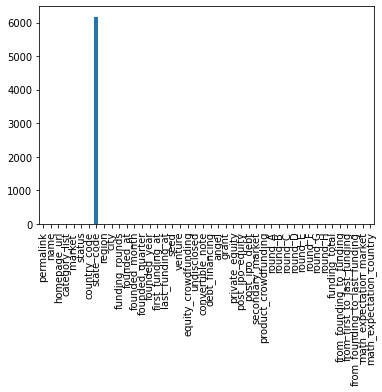

,country_code,startups,startups_percentage,expected_in_top,startups_top,math_expectation
15,CHE,96,0.489821,4.898209,2.0,-59.16875


In [3]:

#AGRUPAMOS LAS STARTUPS POR INDUSTRIA Y CALCULAMOS EL TOTAL QUE TENEMOS
group_country_count = (df_clean.groupby('country_code')['name'].count()).sum()

print('Numero total de startups en el set: ', group_country_count)
print('Numero total de PAISes unicos en el set: ', len(df_clean['country_code'].unique()))

#CREAMOS UN DATAFRAME DEL AGRUPAMIENTO PARA TRABAJAR CON EL 
group_country = pd.DataFrame(df_clean.groupby('country_code')['name'].count())
group_country.reset_index(inplace=True)
group_country.rename(columns={'name':'startups'}, inplace=True)
print('Numero total de PAISes unicos en la agrupacion: ', len(group_country['country_code'].unique()))

#ANADIMOS UNA COLUMNA CON EL % DE STARTUPS POR PAIS COMPARADO CON EL TOTAL
group_country['startups_percentage'] = (group_country['startups'] / group_country_count) * 100

#ANADIMOS UNA COLUMNA CON EL NUMERO DE STARTUPS POR PAIS QUE DEBERIA HABER ENTRE LAS 1000 CON MAYOR FUNDING
group_country['expected_in_top'] = (group_country['startups_percentage'] * 1000)/ 100

#ORDENAMOS POR EL TOTAL FUNDING Y SELECCIONAMOS LAS 1000 PRIMERAS
df_clean.sort_values(by='funding_total', ascending=False, inplace=True)
top_1000_country = df_clean[:1000]

#AGRUPAMOS ESAS 1000 STARTUPS POR PAIS Y CONTAMOS CUANTAS HAY DE CADA PAIS Y ORDENAMOS EN UN DATAFRAME
top_1000_country = top_1000_country.groupby('country_code')['name'].count()
top_1000_country.sort_values(ascending=False, inplace=True)
top_1000_country = pd.DataFrame(data=top_1000_country)
top_1000_country.reset_index(inplace=True)
top_1000_country.rename(columns={'name':'startups_top'}, inplace=True)

#UNIMOS ESE DATAFRAME DE TOP1000 CON EL PRIMER DATAFRAME DEL GRUPO POR PAIS
#HACEMOS UN LEFT JOIN Y RELLENAMOS LOS NAN CON 0
join_country_top = group_country.merge(top_1000_country, how='left', on='country_code')
join_country_top['startups_top'] = join_country_top['startups_top'].fillna(0)


#FINALMENTE, CREAMOS UNA COLUMNA QUE CALCULA LA ESPERANZA MATEMATICA
#ESPERANZA MATEMATICA = (STARTUPS EN EL TOP1000 - LAS QUE DEBERIA HABER EN EL TOP1000) / ESAS QUE DEBERIA HABER EN EL TOP1000 * 100
join_country_top['math_expectation'] = ((join_country_top['startups_top'] - join_country_top['expected_in_top']) / join_country_top['expected_in_top'])*100
join_country_top.sort_values(by='math_expectation', ascending=False, inplace=True)

#YA TENEMOS NUESTRA ESPERANZA MATEMATICA POR PAIS
#YA PODEMOS CREAR UNA COLUMNA EN NUESTRO DATAFRAME PRINCIPAL PARA MOSTRARLA, LA RELLENAMOS DE 0 INICIALMENTE
df_clean['math_expectation_country'] = 0

#CREAMOS UN DICCIONARIO EN EL QUE JUNTAREMOS LOS PAISES CON SUS ESPERANZAS MATEMATICAS
dicc = {}
for i, j in zip(join_country_top['country_code'], join_country_top['math_expectation']):
    dicc[i] = j

#MAPEAMOS LOS PAISES CON SUS ESPERANZAS MATEMATICAS EN LA COLUMNA 'math_expectation_country'
df_clean['math_expectation_country'] = df_clean['country_code'].map(dicc) 
df_clean.sort_values(by='math_expectation_country', ascending=False, inplace=True)


#COMPROBAMOS SI HA QUEDADO ALGUN NAN
print('\nCOMPROBAMOS SI HAY ALGUN NAN')
df_clean.isna().sum().plot(kind="bar")
plt.show()

#REPRESENTAMOS GRAFICAMENTE LA MATH_EXP DPOR PAIS
import plotly.express as px
mathexp_more_than_20  = join_country_top[join_country_top['startups'] > 20]

mathexp_group_country_top = mathexp_more_than_20.sort_values(by='math_expectation', ascending=False)
mathexp_group_country_top

fig13 = px.bar(mathexp_group_country_top[:10], x='country_code', y='math_expectation',
            color='country_code',
             labels={'country_code': 'Best Countries', 'math_expectation':'Mathematical expectation per country'}, height=400)
fig13.show()

fig14 = px.bar(mathexp_group_country_top[-10:], x='country_code', y='math_expectation',
            color='country_code',
             labels={'country_code': 'Worst Countries', 'math_expectation':'Mathematical expectation per country'}, height=400)
fig14.show()

#COMPROBAMOS EL EJEMPLO DEL PAIS 'CHE' = SUIZA, PARA COMPROBAR QUE LA MATH_EXP SE HA CALCULADO CORRECTAMENTE
join_country_top[join_country_top['country_code'] == 'CHE']


### Finalmente, guardamos el DataFrame df_clean para poder abrirlo y aplicar nuestros modelos

In [4]:
df_clean.to_csv('startup_funding_df_clean.csv')